<a href="https://colab.research.google.com/github/DreamZhongJu/TEST_HUBU_Spider/blob/master/%E8%80%83%E5%AF%9F%E6%8A%A5%E5%91%8A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import matplotlib.font_manager as fm

# 设置全局字体路径
font_path = '/content/MizukiGothic-Regular.ttf'
prop = fm.FontProperties(fname=font_path)

# 使用全局字体
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = prop.get_name()

本数据集是与单车有关的数据集，可分析的方向是城市交通规划中，单车车道的修建
初步设想：
每天单车的使用量
每天单车的使用高峰时间点
周末和工作日的使用情况对比
不同距离的单车使用量对比

# 数据预处理


In [3]:
data = pd.read_csv('考查-单车.csv')
data

,Number,Start date,Start station number,Start station,End date,End station number,End station,Bike number,Bike model,Total duration,Total duration (ms)
0,132825189,8/1/2023 0:00,1190.0,"Kennington Lane Rail Bridge, Vauxhall",8/1/2023 0:17,1059.0,"Albert Embankment, Vauxhall",23715,CLASSIC,16m 46s,1006663
1,132825190,8/1/2023 0:00,1190.0,"Kennington Lane Rail Bridge, Vauxhall",8/1/2023 0:17,1059.0,"Albert Embankment, Vauxhall",41267,CLASSIC,16m 47s,1007128
2,132825191,8/1/2023 0:00,983.0,"Euston Road, Euston",8/1/2023 0:11,3500.0,"Baldwin Street, St. Luke's",53180,CLASSIC,11m 6s,666395
3,132825192,8/1/2023 0:01,3479.0,"Old Brompton Road, South Kensington",8/1/2023 0:12,1140.0,"Grosvenor Road, Pimlico",53431,CLASSIC,11m 53s,713059
4,132825193,8/1/2023 0:01,1219.0,"Lower Marsh, Waterloo",8/1/2023 0:17,200056.0,"Vauxhall Walk, Vauxhall",54758,CLASSIC,16m 3s,963786
...,...,...,...,...,...,...,...,...,...,...,...
776522,133624570,8/31/2023 23:59,988.0,"Great Russell Street, Bloomsbury",9/1/2023 0:21,200071.0,"Hoxton Street, Hoxton",21149,CLASSIC,22m 0s,1320884
776523,133624571,8/31/2023 23:59,2660.0,"Frith Street, Soho",9/1/2023 0:10,3496.0,"St Mary's Hospital, Paddington",59065,CLASSIC,11m 2s,662204
776524,133624572,8/31/2023 23:59,200190.0,"Queen's Circus, Battersea Park",9/1/2023 0:13,3435.0,"Gloucester Road (Central), South Kensington",53860,CLASSIC,13m 38s,818554
776525,133624573,8/31/2023 23:59,959.0,"Milroy Walk, South Bank",9/1/2023 0:06,1142.0,"Tooley Street, Bermondsey",56206,CLASSIC,7m 0s,420132


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776527 entries, 0 to 776526
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Number                776527 non-null  int64  
 1   Start date            776527 non-null  object 
 2   Start station number  776526 non-null  float64
 3   Start station         776527 non-null  object 
 4   End date              776527 non-null  object 
 5   End station number    776526 non-null  float64
 6   End station           776527 non-null  object 
 7   Bike number           776527 non-null  int64  
 8   Bike model            776527 non-null  object 
 9   Total duration        776527 non-null  object 
 10  Total duration (ms)   776527 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 65.2+ MB


In [5]:
# 清除缺失值
data = data.dropna()

In [6]:
# 生成{Start station number: Start station}字典
start_station_dict = dict(zip(data['Start station number'], data['Start station']))
# 生成{End station number: End station}字典
end_station_dict = dict(zip(data['End station number'], data['End station']))

In [7]:
# 计算标准差和均值
std = data['Total duration (ms)'].std()
mean = data['Total duration (ms)'].mean()
# 根据标准差和均值，筛选出异常值的索引
threshold = 3
outliers = data[(data['Total duration (ms)'] > mean + threshold * std) | (data['Total duration (ms)'] < mean - threshold * std)].index
# 删除异常值
data = data.drop(outliers)
# 重置索引
data = data.reset_index(drop=True)

data

,Number,Start date,Start station number,Start station,End date,End station number,End station,Bike number,Bike model,Total duration,Total duration (ms)
0,132825189,8/1/2023 0:00,1190.0,"Kennington Lane Rail Bridge, Vauxhall",8/1/2023 0:17,1059.0,"Albert Embankment, Vauxhall",23715,CLASSIC,16m 46s,1006663
1,132825190,8/1/2023 0:00,1190.0,"Kennington Lane Rail Bridge, Vauxhall",8/1/2023 0:17,1059.0,"Albert Embankment, Vauxhall",41267,CLASSIC,16m 47s,1007128
2,132825191,8/1/2023 0:00,983.0,"Euston Road, Euston",8/1/2023 0:11,3500.0,"Baldwin Street, St. Luke's",53180,CLASSIC,11m 6s,666395
3,132825192,8/1/2023 0:01,3479.0,"Old Brompton Road, South Kensington",8/1/2023 0:12,1140.0,"Grosvenor Road, Pimlico",53431,CLASSIC,11m 53s,713059
4,132825193,8/1/2023 0:01,1219.0,"Lower Marsh, Waterloo",8/1/2023 0:17,200056.0,"Vauxhall Walk, Vauxhall",54758,CLASSIC,16m 3s,963786
...,...,...,...,...,...,...,...,...,...,...,...
775362,133624570,8/31/2023 23:59,988.0,"Great Russell Street, Bloomsbury",9/1/2023 0:21,200071.0,"Hoxton Street, Hoxton",21149,CLASSIC,22m 0s,1320884
775363,133624571,8/31/2023 23:59,2660.0,"Frith Street, Soho",9/1/2023 0:10,3496.0,"St Mary's Hospital, Paddington",59065,CLASSIC,11m 2s,662204
775364,133624572,8/31/2023 23:59,200190.0,"Queen's Circus, Battersea Park",9/1/2023 0:13,3435.0,"Gloucester Road (Central), South Kensington",53860,CLASSIC,13m 38s,818554
775365,133624573,8/31/2023 23:59,959.0,"Milroy Walk, South Bank",9/1/2023 0:06,1142.0,"Tooley Street, Bermondsey",56206,CLASSIC,7m 0s,420132


In [8]:
data.dtypes

Number                    int64
Start date               object
Start station number    float64
Start station            object
End date                 object
End station number      float64
End station              object
Bike number               int64
Bike model               object
Total duration           object
Total duration (ms)       int64
dtype: object

In [9]:
attributes_to_drop = ['Number','Start station', 'End station','Bike number','Total duration']
data = data.drop(attributes_to_drop, axis=1)
data

,Start date,Start station number,End date,End station number,Bike model,Total duration (ms)
0,8/1/2023 0:00,1190.0,8/1/2023 0:17,1059.0,CLASSIC,1006663
1,8/1/2023 0:00,1190.0,8/1/2023 0:17,1059.0,CLASSIC,1007128
2,8/1/2023 0:00,983.0,8/1/2023 0:11,3500.0,CLASSIC,666395
3,8/1/2023 0:01,3479.0,8/1/2023 0:12,1140.0,CLASSIC,713059
4,8/1/2023 0:01,1219.0,8/1/2023 0:17,200056.0,CLASSIC,963786
...,...,...,...,...,...,...
775362,8/31/2023 23:59,988.0,9/1/2023 0:21,200071.0,CLASSIC,1320884
775363,8/31/2023 23:59,2660.0,9/1/2023 0:10,3496.0,CLASSIC,662204
775364,8/31/2023 23:59,200190.0,9/1/2023 0:13,3435.0,CLASSIC,818554
775365,8/31/2023 23:59,959.0,9/1/2023 0:06,1142.0,CLASSIC,420132


In [10]:
data['Bike model'] = pd.factorize(data['Bike model'])[0]
data

,Start date,Start station number,End date,End station number,Bike model,Total duration (ms)
0,8/1/2023 0:00,1190.0,8/1/2023 0:17,1059.0,0,1006663
1,8/1/2023 0:00,1190.0,8/1/2023 0:17,1059.0,0,1007128
2,8/1/2023 0:00,983.0,8/1/2023 0:11,3500.0,0,666395
3,8/1/2023 0:01,3479.0,8/1/2023 0:12,1140.0,0,713059
4,8/1/2023 0:01,1219.0,8/1/2023 0:17,200056.0,0,963786
...,...,...,...,...,...,...
775362,8/31/2023 23:59,988.0,9/1/2023 0:21,200071.0,0,1320884
775363,8/31/2023 23:59,2660.0,9/1/2023 0:10,3496.0,0,662204
775364,8/31/2023 23:59,200190.0,9/1/2023 0:13,3435.0,0,818554
775365,8/31/2023 23:59,959.0,9/1/2023 0:06,1142.0,0,420132


## 将起始时间、终止时间转换为时间类型

In [11]:
data['Start date'] = pd.to_datetime(data['Start date'], format='%m/%d/%Y %H:%M')
data['End date'] = pd.to_datetime(data['End date'], format='%m/%d/%Y %H:%M')
data = data[(data['Start date'].dt.month <= 9) & (data['End date'].dt.month <= 9)]
data = data.reset_index(drop=True)
data

,Start date,Start station number,End date,End station number,Bike model,Total duration (ms)
0,2023-08-01 00:00:00,1190.0,2023-08-01 00:17:00,1059.0,0,1006663
1,2023-08-01 00:00:00,1190.0,2023-08-01 00:17:00,1059.0,0,1007128
2,2023-08-01 00:00:00,983.0,2023-08-01 00:11:00,3500.0,0,666395
3,2023-08-01 00:01:00,3479.0,2023-08-01 00:12:00,1140.0,0,713059
4,2023-08-01 00:01:00,1219.0,2023-08-01 00:17:00,200056.0,0,963786
...,...,...,...,...,...,...
775362,2023-08-31 23:59:00,988.0,2023-09-01 00:21:00,200071.0,0,1320884
775363,2023-08-31 23:59:00,2660.0,2023-09-01 00:10:00,3496.0,0,662204
775364,2023-08-31 23:59:00,200190.0,2023-09-01 00:13:00,3435.0,0,818554
775365,2023-08-31 23:59:00,959.0,2023-09-01 00:06:00,1142.0,0,420132


In [12]:
data.dtypes

Start date              datetime64[ns]
Start station number           float64
End date                datetime64[ns]
End station number             float64
Bike model                       int64
Total duration (ms)              int64
dtype: object

# 计算各个单车的使用频次

In [13]:
usage_frequency = data.groupby(data['Start date'].dt.date).size()
usage_frequency

Start date
2023-08-01    30013
2023-08-02    20601
2023-08-03    29788
2023-08-04    24915
2023-08-05    11601
2023-08-06    20444
2023-08-07    26610
2023-08-08    22200
2023-08-09    31755
2023-08-10    30912
2023-08-11    25878
2023-08-12    21543
2023-08-13    20961
2023-08-14    23624
2023-08-15    30860
2023-08-16    31101
2023-08-17    30175
2023-08-18    22065
2023-08-19    23920
2023-08-20    22150
2023-08-21    26883
2023-08-22    29951
2023-08-23    31085
2023-08-24    25078
2023-08-25    24156
2023-08-26    17524
2023-08-27    19380
2023-08-28    20888
2023-08-29    25461
2023-08-30    28624
2023-08-31    25221
dtype: int64

图文展示

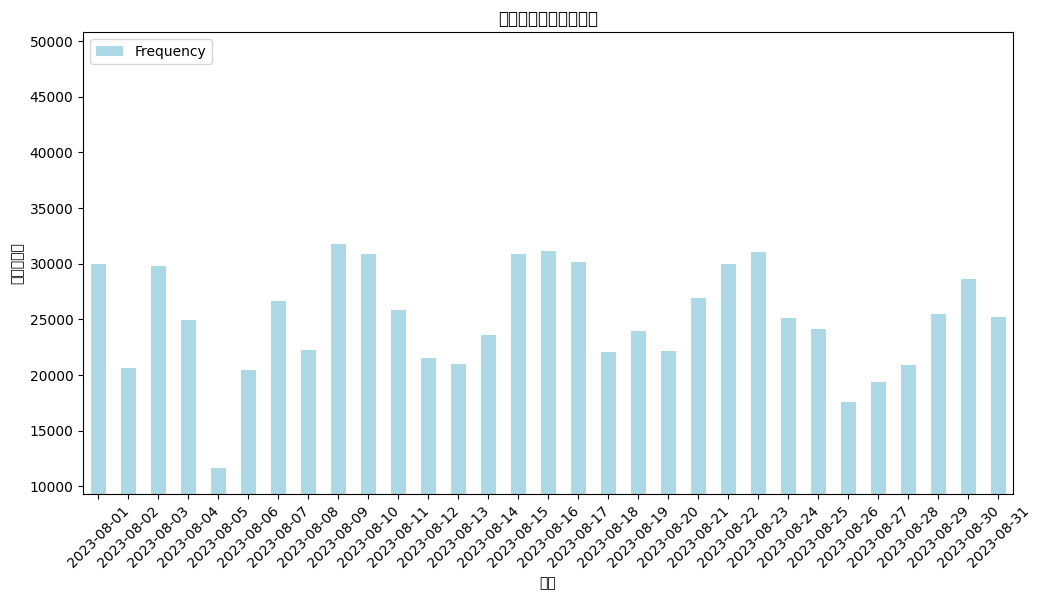

In [14]:
fig, ax1 = plt.subplots(figsize=(12, 6))

usage_frequency.plot(kind='bar', ax=ax1, color='lightblue', label='Frequency')

ax1.set_ylabel('频次（辆）')
ax1.set_title('共享单车每天使用频次')
ax1.set_xlabel('时间')
ax1.tick_params(axis='x', rotation=45)

# 添加图例
ax1.legend(loc='upper left')
ax1.set_ylim(usage_frequency.min() * 0.8, usage_frequency.max() * 1.6)

plt.show()

工作日和休息日的对比

In [15]:
# 提取日期的工作日和休息日
data['Day of Week'] = data['Start date'].dt.weekday

# 频次统计
frequency_by_day = data.groupby(['Day of Week']).size()

# 创建字典
day_of_week_dict = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# 统计工作日和休息日的频次
workday_frequency = frequency_by_day[0:5].sum()/5
weekend_frequency = frequency_by_day[5:7].sum()/2

# 打印工作日和休息日的频次
print("工作日频次：", workday_frequency)
print("休息日频次：", weekend_frequency)

工作日频次： 123568.8
休息日频次： 78761.5


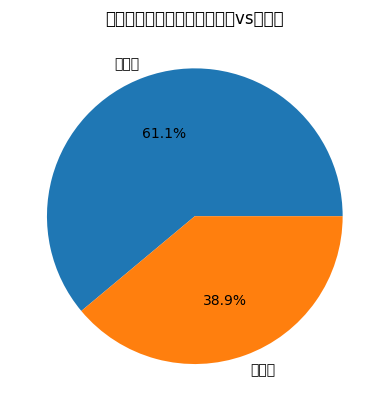

In [16]:
# 创建工作日和休息日的频次列表
frequency_list = [workday_frequency, weekend_frequency]
labels = ['工作日', '休息日']
plt.pie(frequency_list, labels=labels, autopct='%1.1f%%')
plt.title('共享单车平均使用频率工作日vs休息日')
plt.show()

统计工作日的共享单车使用时间段

In [17]:
# 提取工作日数据
workday_data = data[data['Start date'].dt.weekday < 5]

# 提取每个时间段的小时数
workday_data['Hour'] = workday_data['Start date'].dt.hour

# 统计每个时间段的单车使用频次
usage_frequency_by_hour = workday_data.groupby('Hour').size()

# 打印每个时间段的单车使用频次
print(usage_frequency_by_hour)

Hour
0      4418
1      2386
2      1402
3       916
4      1256
5      3490
6     14691
7     36864
8     62959
9     36154
10    22199
11    23004
12    27252
13    27197
14    26806
15    29077
16    40115
17    68805
18    68900
19    44168
20    29223
21    20428
22    15893
23    10241
dtype: int64


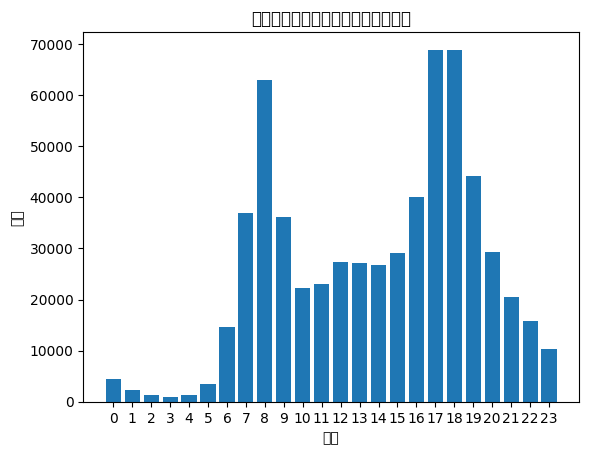

In [18]:
# 统计每个时间段的单车使用频次
usage_frequency_by_hour = workday_data.groupby('Hour').size()

# 绘制柱状图
plt.bar(usage_frequency_by_hour.index, usage_frequency_by_hour.values)
plt.xlabel('小时')
plt.ylabel('频次')
plt.title('工作日各个时间段共享单车使用统计')
plt.xticks(range(24))
plt.show()

统计休息日的共享单车使用时间段

In [19]:
# 提取工作日数据
workend_data = data[data['Start date'].dt.weekday >= 5]

# 提取每个时间段的小时数
workend_data['Hour'] = workend_data['Start date'].dt.hour

# 统计每个时间段的单车使用频次
usage_frequency_by_hour = workend_data.groupby('Hour').size()

# 打印每个时间段的单车使用频次
print(usage_frequency_by_hour)

Hour
0      3035
1      2049
2      1421
3       959
4       774
5       648
6      1168
7      2257
8      4226
9      6772
10     9730
11    11407
12    12104
13    12327
14    12217
15    12260
16    11632
17    11909
18    11391
19     9434
20     7133
21     4958
22     4252
23     3460
dtype: int64


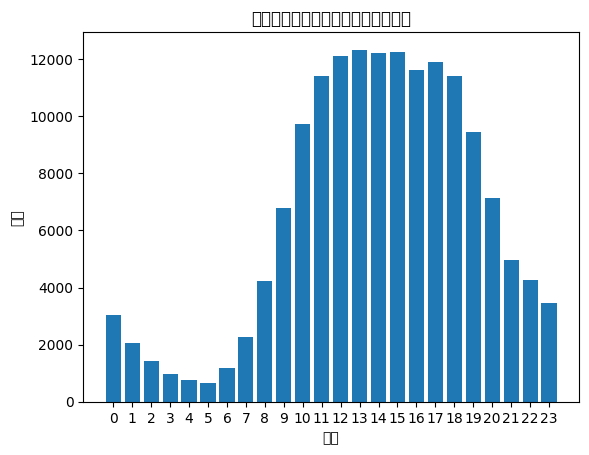

In [20]:
import matplotlib.pyplot as plt

# 统计每个时间段的单车使用频次
usage_frequency_by_hour = workend_data.groupby('Hour').size()

# 绘制柱状图
plt.bar(usage_frequency_by_hour.index, usage_frequency_by_hour.values)
plt.xlabel('小时')
plt.ylabel('频次')
plt.title('休息日各个时间段共享单车使用统计')
plt.xticks(range(24))
plt.show()

分析共享单车出入量最大的站点

工作日

In [21]:
workdays = data[data['Start date'].dt.weekday < 5]
workdays = workdays.dropna()
workdays = workdays.reset_index(drop=True)
attributes_to_drop = ['Start date','End date','Day of Week','Bike model']
workdays = workdays.drop(attributes_to_drop, axis=1)
workdays

,Start station number,End station number,Total duration (ms)
0,1190.0,1059.0,1006663
1,1190.0,1059.0,1007128
2,983.0,3500.0,666395
3,3479.0,1140.0,713059
4,1219.0,200056.0,963786
...,...,...,...
617839,988.0,200071.0,1320884
617840,2660.0,3496.0,662204
617841,200190.0,3435.0,818554
617842,959.0,1142.0,420132


In [22]:
import pandas as pd

# 计算Start station number最多的站点
most_frequent_start_stations = workdays['Start station number'].value_counts().idxmax()
most_frequent_end_stations = workdays['End station number'].value_counts().idxmax()

# 计算平均Total duration (ms)时长并转换为分钟
mean_duration_ms = workdays['Total duration (ms)'].mean()
mean_duration_min = mean_duration_ms / (1000 * 60)  # 转换为分钟

# 打印结果
print("Start station number最多的站点:", start_station_dict[most_frequent_start_stations])
print("End station number最多的站点:", end_station_dict[most_frequent_end_stations])
print("平均Total duration时长（分钟）:", mean_duration_min)

Start station number最多的站点: Hyde Park Corner, Hyde Park
End station number最多的站点: Hyde Park Corner, Hyde Park
平均Total duration时长（分钟）: 18.60209222756877


休息日

In [23]:
weekend = data[data['Start date'].dt.weekday >= 5]
weekend = weekend.dropna()
weekend = weekend.reset_index(drop=True)
attributes_to_drop = ['Start date','End date','Day of Week','Bike model']
weekend = weekend.drop(attributes_to_drop, axis=1)
weekend

,Start station number,End station number,Total duration (ms)
0,1094.0,200194.0,2185302
1,200038.0,1077.0,757253
2,300214.0,300214.0,1891466
3,200069.0,10632.0,215909
4,300207.0,300036.0,345233
...,...,...,...
157518,300042.0,200204.0,219401
157519,200081.0,3447.0,655174
157520,200239.0,2679.0,1038712
157521,300030.0,3420.0,795543


In [24]:
import pandas as pd

# 计算Start station number最多的站点
most_frequent_start_stations = weekend['Start station number'].value_counts().idxmax()
most_frequent_end_stations = weekend['End station number'].value_counts().idxmax()

# 计算平均Total duration (ms)时长并转换为分钟
mean_duration_ms = weekend['Total duration (ms)'].mean()
mean_duration_min = mean_duration_ms / (1000 * 60)  # 转换为分钟

# 打印结果
print("Start station number最多的站点:", start_station_dict[most_frequent_start_stations])
print("End station number最多的站点:", end_station_dict[most_frequent_end_stations])
print("平均Total duration时长（分钟）:", mean_duration_min)

Start station number最多的站点: Hyde Park Corner, Hyde Park
End station number最多的站点: Hyde Park Corner, Hyde Park
平均Total duration时长（分钟）: 23.138493354727032


聚类分析

In [25]:
data['Start date'] = pd.to_datetime(data['Start date'])
data['End date'] = pd.to_datetime(data['End date'])
data['Start hour'] = data['Start date'].dt.hour
data['End hour'] = data['End date'].dt.hour
data['Weekday'] = data['Start date'].dt.weekday
data = data.dropna()
data = data.reset_index(drop=True)
data

,Start date,Start station number,End date,End station number,Bike model,Total duration (ms),Day of Week,Start hour,End hour,Weekday
0,2023-08-01 00:00:00,1190.0,2023-08-01 00:17:00,1059.0,0,1006663,1,0,0,1
1,2023-08-01 00:00:00,1190.0,2023-08-01 00:17:00,1059.0,0,1007128,1,0,0,1
2,2023-08-01 00:00:00,983.0,2023-08-01 00:11:00,3500.0,0,666395,1,0,0,1
3,2023-08-01 00:01:00,3479.0,2023-08-01 00:12:00,1140.0,0,713059,1,0,0,1
4,2023-08-01 00:01:00,1219.0,2023-08-01 00:17:00,200056.0,0,963786,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
775362,2023-08-31 23:59:00,988.0,2023-09-01 00:21:00,200071.0,0,1320884,3,23,0,3
775363,2023-08-31 23:59:00,2660.0,2023-09-01 00:10:00,3496.0,0,662204,3,23,0,3
775364,2023-08-31 23:59:00,200190.0,2023-09-01 00:13:00,3435.0,0,818554,3,23,0,3
775365,2023-08-31 23:59:00,959.0,2023-09-01 00:06:00,1142.0,0,420132,3,23,0,3


In [26]:
import numpy as np

# 特征选择
features = ['Start hour', 'End hour', 'Weekday','Total duration (ms)']
X = data[features]

# 随机采样
np.random.seed(42)
sampled_indices = np.random.choice(X.shape[0], size=100000, replace=False)
X_sampled = X.iloc[sampled_indices]


print("采样后的数据：")
print(X_sampled)

采样后的数据：
        Start hour  End hour  Weekday  Total duration (ms)
456814           8         8        5               483731
138453           6         7        0              1593690
439019          11        11        4               268409
638307           0         0        5               713954
773544          21        21        3               447822
...            ...       ...      ...                  ...
108791          11        12        5              2182366
22459           18        18        1               819537
232296          14        14        3               326903
327661          14        14        0               640662
102679          20        20        4               699022

[100000 rows x 4 columns]


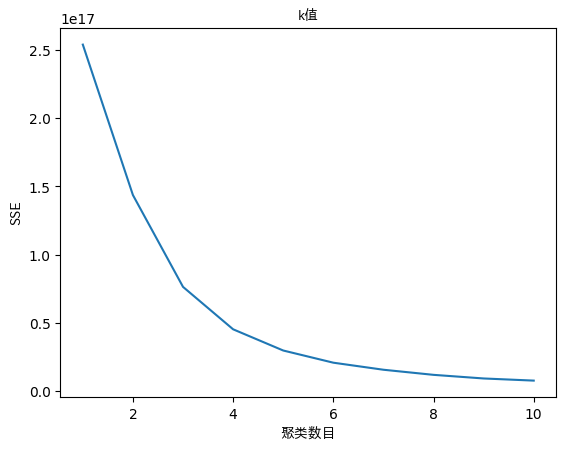

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_sampled)
    sse.append(kmeans.inertia_)

plt.plot(k_range, sse)
plt.xlabel('聚类数目', fontproperties=prop)
plt.ylabel('SSE', fontproperties=prop)
plt.title('k值', fontproperties=prop)
plt.show()

In [28]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
predict_result = kmeans.fit_predict(X_sampled)

In [29]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_sampled[::100], predict_result[::100])
print(f'Silhouette Score: {score}')

Silhouette Score: 0.7965915841243238


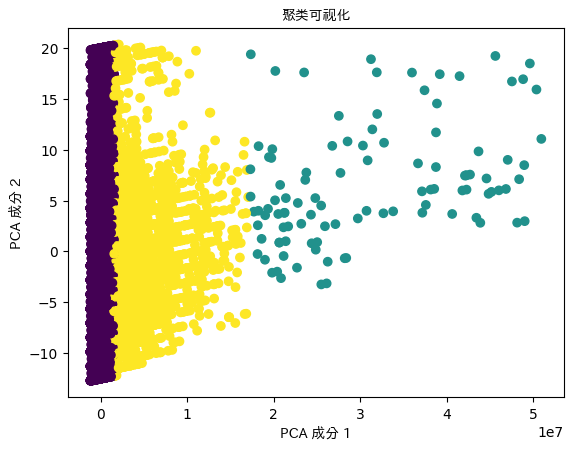

In [30]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sampled)

# 绘制散点图
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predict_result)
plt.xlabel('PCA 成分 1', fontproperties=prop)
plt.ylabel('PCA 成分 2', fontproperties=prop)
plt.title('聚类可视化', fontproperties=prop)
plt.show()

In [31]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=features)
cluster_centers.iloc[:, -1] = cluster_centers.iloc[:, -1] / (1000 * 60)
cluster_centers

,Start hour,End hour,Weekday,Total duration (ms)
0,13.998474,14.160147,2.682705,15.224130
1,13.346154,12.990385,2.971154,536.643607
2,14.689744,15.393077,3.182142,76.123036


In [32]:
cluster_counts = cluster_centers.value_counts()
print(cluster_counts)

Start hour  End hour   Weekday   Total duration (ms)
13.346154   12.990385  2.971154  536.643607             1
13.998474   14.160147  2.682705  15.224130              1
14.689744   15.393077  3.182142  76.123036              1
Name: count, dtype: int64


xgboost实现根据出发地和终止地，起始小时，来预测骑行所用时间

In [34]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = data[['Start station number', 'End station number', 'Start hour']]
y = data['Total duration (ms)']

# 随机采样
np.random.seed(42)
sampled_indices = np.random.choice(X.shape[0], size=100000, replace=False)
X_sampled = X.iloc[sampled_indices]
sampled_indices = np.random.choice(y.shape[0], size=100000, replace=False)
Y_sampled = y.iloc[sampled_indices]

X_encoded = pd.get_dummies(X_sampled, columns=['Start station number', 'End station number'])

X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y_sampled, test_size=0.2, random_state=42)
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3076540936963.574


In [35]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

R^2 Score: -0.04257272680788038


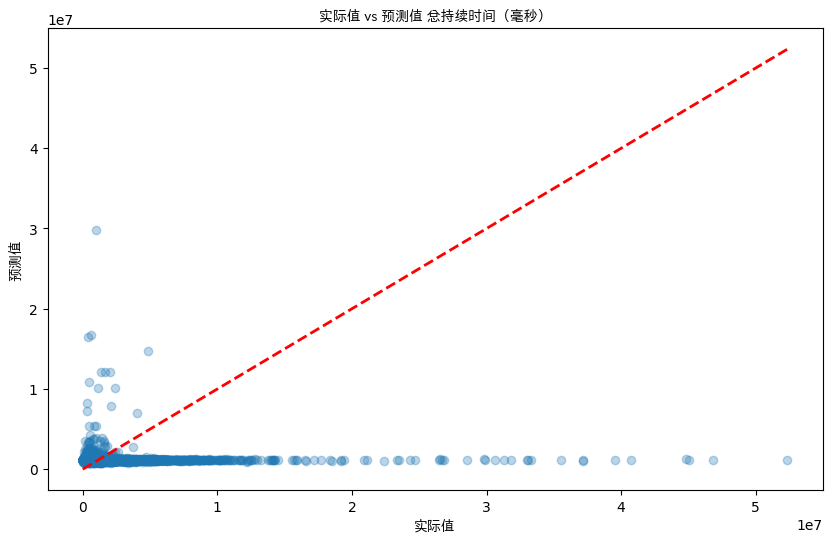

In [38]:
# 可视化结果
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('实际值', fontproperties=prop)
plt.ylabel('预测值', fontproperties=prop)
plt.title('实际值 vs 预测值 总持续时间（毫秒）', fontproperties=prop)
plt.show()